In [85]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import seaborn as sns
import numpy as np
%config InlineBackend.figure_format='retina'
# Load the iris dataset
iris = load_iris()
X = iris.data
p = X.shape[1]

# Instantiate PCA with 2 principal components
pca = PCA()

# Fit and transform the data to the new coordinate system
X_transformed = pca.fit_transform(X) # scores

In [115]:
loadings = pca.components_
loadings

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [116]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [117]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [148]:
vars_names = iris.feature_names
comp_names = ["PC " + str(i) for i in range(1, p+1)]

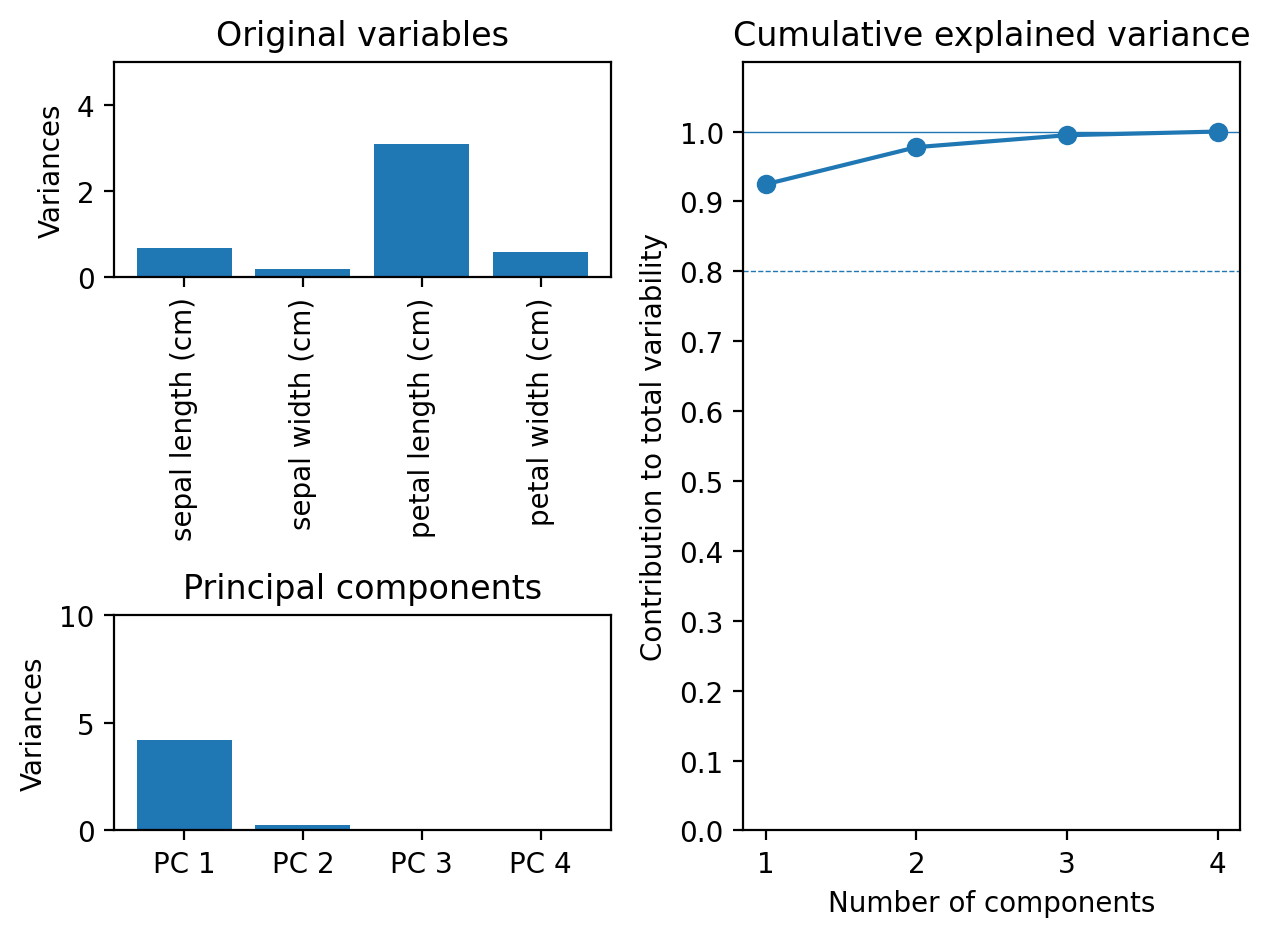

In [151]:
plt.subplot(221)
plt.bar(vars_names, np.var(X, axis=0))
plt.xticks(rotation=90)
plt.title('Original variables')
plt.ylabel('Variances')
plt.ylim([0, 5])

plt.subplot(223)
plt.bar(comp_names, np.var(X_transformed, axis=0))
plt.title('Principal components')
plt.ylabel('Variances')
plt.ylim([0, 10])

plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of components')
plt.ylabel('Contribution to total variability')
plt.ylim([0, 1.1])
plt.axhline(y=1, lw=0.5)
plt.axhline(y=0.8, linestyle='--', lw=0.5)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0,p), np.arange(1,p+1))
plt.title('Cumulative explained variance')

plt.tight_layout()
plt.show()

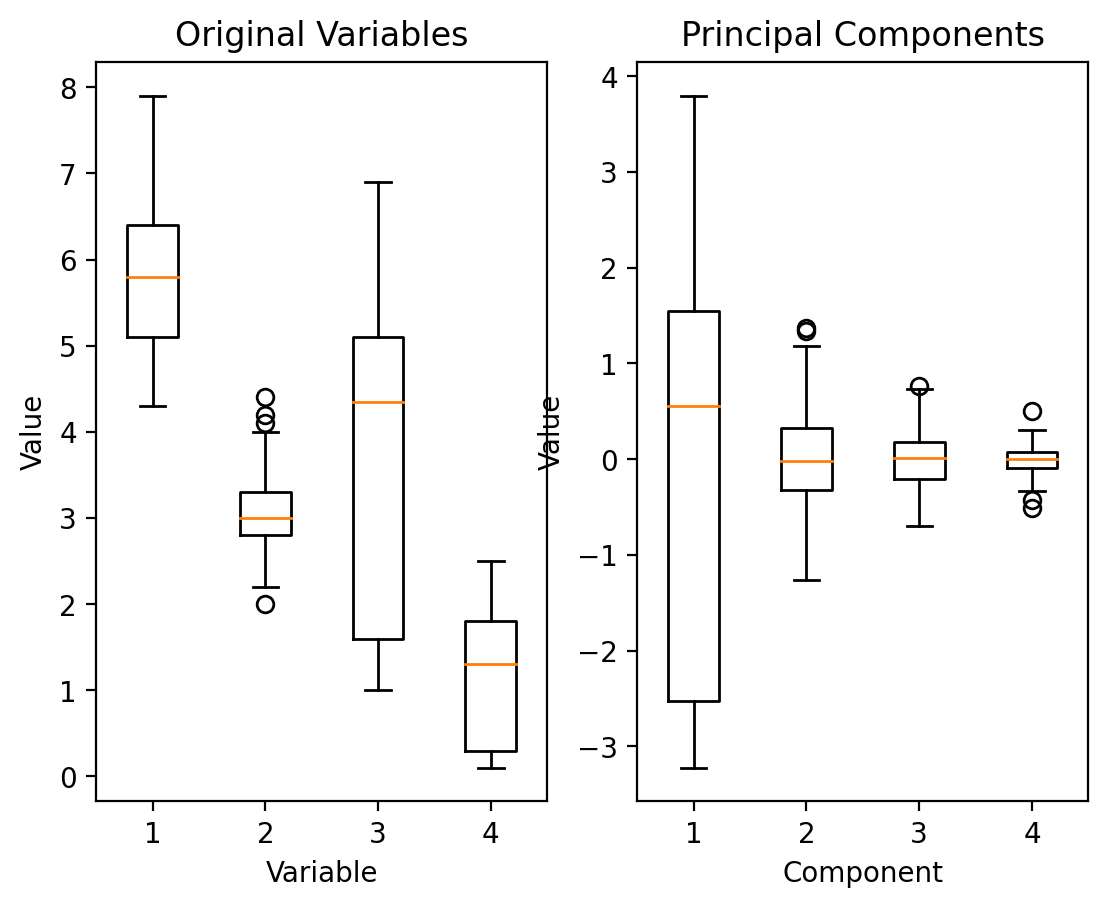

In [128]:
fig, axes = plt.subplots(1,2)

# Create boxplot of original variables
plt.sca(axes[0])
plt.boxplot(X)
plt.title('Original Variables')
plt.xlabel('Variable')
plt.ylabel('Value')

# Create boxplot of principal components
plt.sca(axes[1])
plt.boxplot(X_transformed)
plt.title('Principal Components')
plt.xlabel('Component')
plt.ylabel('Value')

plt.show()

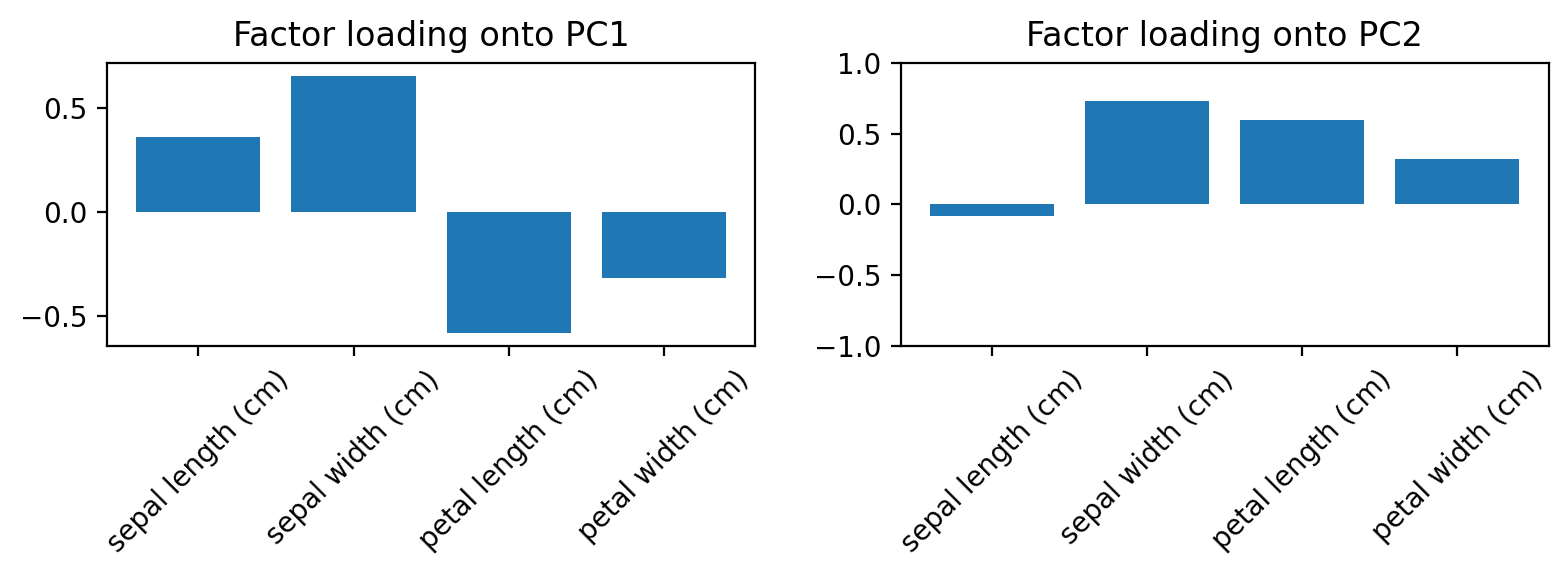

In [155]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].bar(range(4), loadings[:, 0], align='center')
ax[1].bar(range(4), loadings[:, 1], align='center')

ax[0].set_title('Factor loading onto PC1')
ax[1].set_title('Factor loading onto PC2')

ax[0].set_xticks(range(4))
ax[1].set_xticks(range(4))
ax[0].set_xticklabels(vars_names, rotation=45)
ax[1].set_xticklabels(vars_names, rotation=45)
plt.ylim([-1, 1])
plt.tight_layout()

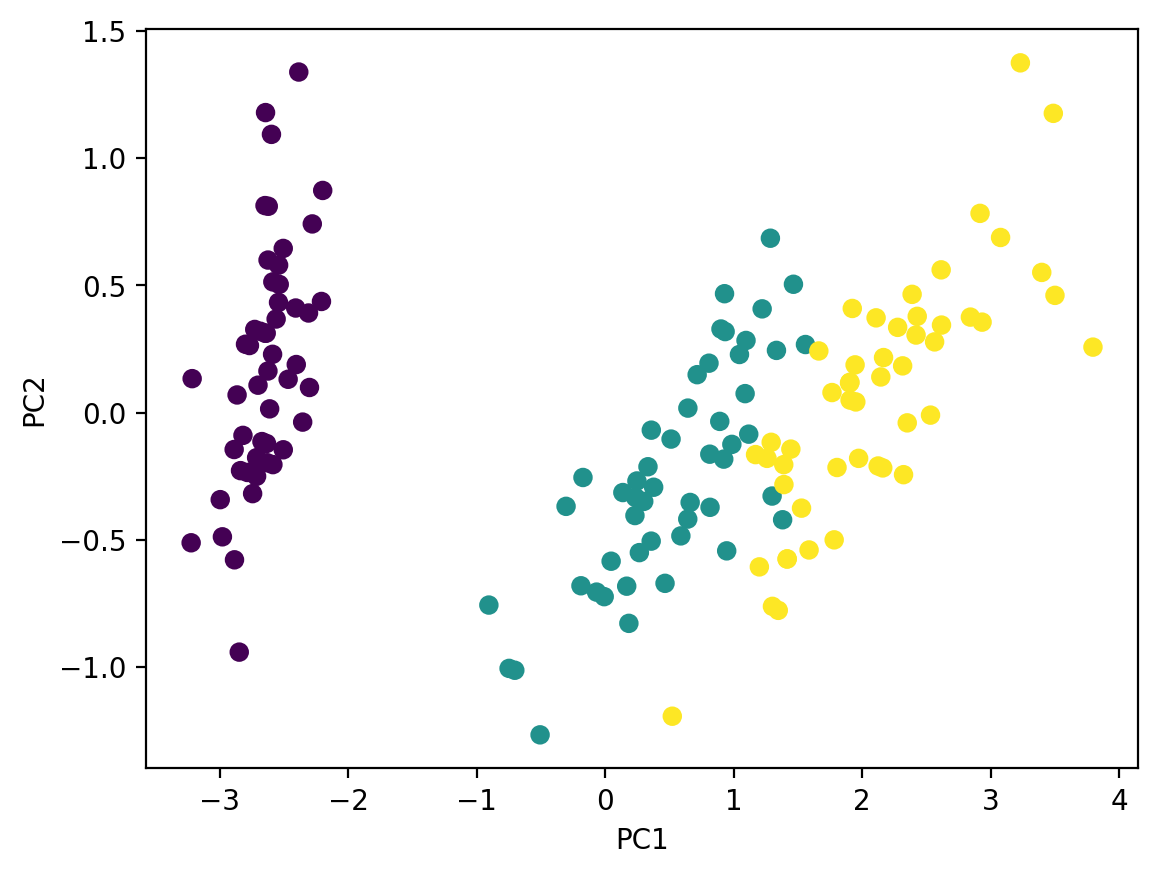

In [129]:
# Visualize the data in the new coordinate system
import matplotlib.pyplot as plt
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()